<a href="https://colab.research.google.com/github/UmaliPrinceGenel/CSST102-3B-1AY2526/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# **1. Dataset Selection**

In [2]:
df= pd.read_csv("sample_data/diabetes2.csv") #DIABETES

# **2. Data Preparation**

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()
print("-"*50)
print("Missing Values")
print(df.isnull().sum())
print("-"*50)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
--------------------------------------------------
Missing Values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                     

In [5]:
# Has a zero values
features_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_clean = df.copy()
df_clean[features_to_fix] = df_clean[features_to_fix].replace(0, np.nan)

In [6]:
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [8]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# **3. Train-Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# **4. Model Building - Logistic Regression**

In [10]:
#It combines the imputer, scaler,and model so that it avoids data leaking and makes the code cleaner :>
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', C=0.1, max_iter=1000, random_state=1))
])

In [11]:

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, random_state=1))])

In [12]:
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

In [13]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

Training Accuracy: 0.7541
Testing Accuracy:  0.8052


# 5. **Cross-Validation**

In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print("-" * 30)
print(f"Mean 5-Fold CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation:       {cv_scores.std():.4f}")

Fold 1: 0.7532
Fold 2: 0.7208
Fold 3: 0.8377
Fold 4: 0.7190
Fold 5: 0.7386
------------------------------
Mean 5-Fold CV Accuracy: 0.7538
Standard Deviation:       0.0437


# **6. Model Evaluation - Confusion Matrix**

In [15]:
cm = confusion_matrix(y_test, test_pred)

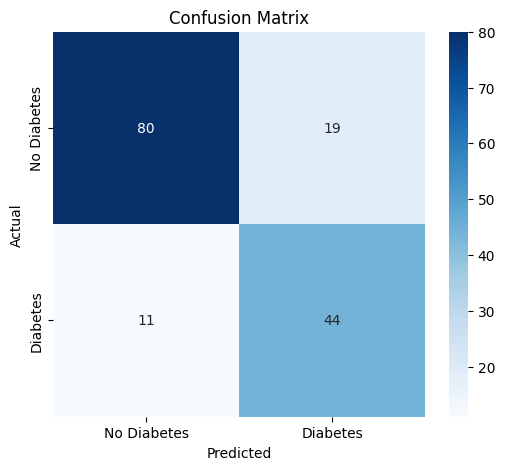

In [16]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:

print("Classification Report:")
print(classification_report(y_test, test_pred, target_names=['No Diabetes', 'Diabetes']))

acc = accuracy_score(y_test, test_pred)
print(f"\nAccuracy:  {acc:.4f}")

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      0.81      0.84        99
    Diabetes       0.70      0.80      0.75        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.81      0.81      0.81       154


Accuracy:  0.8052


# **7. Learning Curve Visualization**

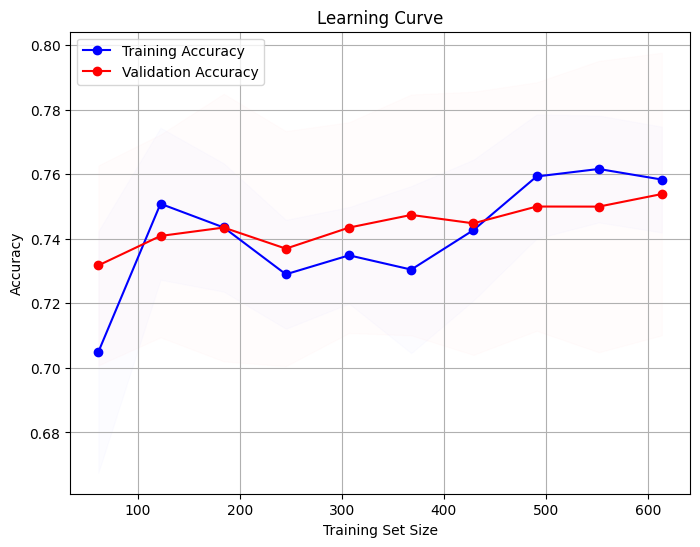

In [18]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipeline,
    X=X,
    y=y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.01, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.01, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Challenge**


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_pipeline = Pipeline([
    ('preprocessor', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        class_weight='balanced',
        min_samples_leaf = 10,
        random_state=42
    ))
])

In [21]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [22]:
train_pred = rf_pipeline.predict(X_train)
test_pred = rf_pipeline.predict(X_test)

In [23]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

Training Accuracy: 0.8029
Testing Accuracy:  0.8052


In [31]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print("-" * 30)
print(f"Mean 5-Fold CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation:       {cv_scores.std():.4f}")

Fold 1: 0.7273
Fold 2: 0.7208
Fold 3: 0.8571
Fold 4: 0.7451
Fold 5: 0.7516
------------------------------
Mean 5-Fold CV Accuracy: 0.7604
Standard Deviation:       0.0497


In [25]:
cm = confusion_matrix(y_test, test_pred)

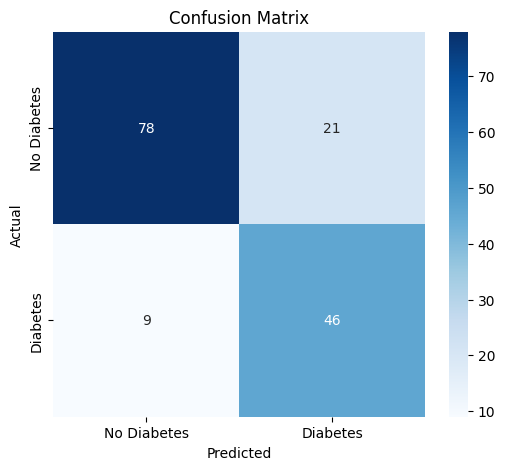

In [26]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
print("Classification Report:")
print(classification_report(y_test, test_pred, target_names=['No Diabetes', 'Diabetes']))

acc = accuracy_score(y_test, test_pred)
print(f"\nAccuracy:  {acc:.4f}")

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.90      0.79      0.84        99
    Diabetes       0.69      0.84      0.75        55

    accuracy                           0.81       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.82      0.81      0.81       154


Accuracy:  0.8052


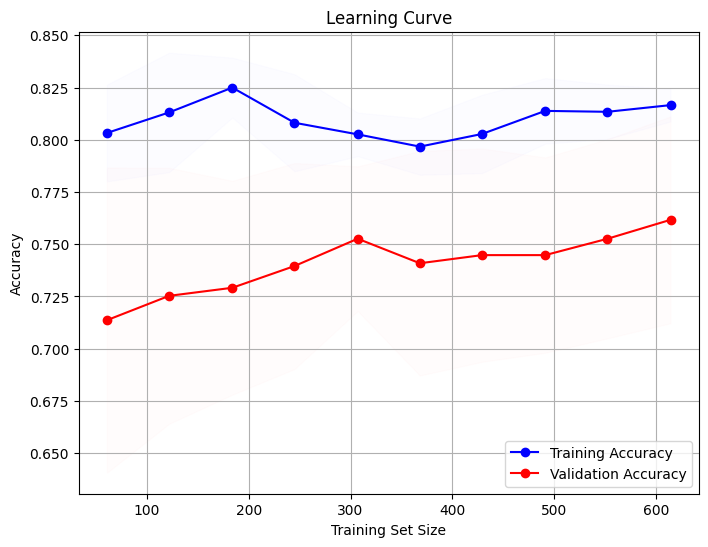

In [28]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=rf_pipeline,
    X=X,
    y=y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.01, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.01, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In this challenge, I compared the logistic regression and random forest classifier to predict diabetes. Both models have the same test accuracy of 80.52%. In confusion matrix for logistic regression it corrected 80 people have no diabetes and has 44 correctly predicted that has diabetes. The logistic regression also has false positives, which are 19, and false negatives, which are 11. While the random forest classifier has 78 correctly predicted that have no diabetes, and 46 predicted that have diabetes, but it has 21 false positives and 9 false negatives. In terms of learning curves, the logistic regression has a graph for a good fit because the training and accuracy score are close to each other, while the random forest classifier it shows some sign of overfitting. In Conclusion, logistic regression is better than the random forest classifier because it is simpler, and for me, it is the better choice for the prediction of diabetes.